# Clase 10: Reorganización, Multi-Índices y Agregación de Datos

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

## Objetivos


Es Habitual que la información se encuentre dispersa en distintas fuentes y con distintas formas. 
El dar forma, organizar, unir y agrupar estas distintas fuentes de información es una componente muy importante del análisis de datos. 

- Aprender a organizar los `DataFrames`: transponer, pivotear y fundir (melt).
- Explorar el mecanismo de agrupación de pandas: Group By, aggregate, transform y filter.

### Roadmap

**Unidad 3: Manejo de Datos con Pandas y AED**

- [X] Introducción a Manejo de Datos Tabulares con Pandas
- [ ] Reorganización, Multi-Índices y Agregación de Datos.
- [ ] Concatenación y Combinación de Múltiples Fuentes de Datos.
- [ ] Trabajo con strings y datos temporales, categóricos y ordinales en Pandas.




## Cargando Índices para una Vida Mejor

En esta clase, seguiremos usando los datos de índices para una Vida Mejor de la OECD:


<img src="./resources/oecd.png" alt="OECD Better life index"/>


http://www.oecdbetterlifeindex.org/

https://stats.oecd.org/index.aspx?DataSetCode=BLI

Son 11 temas considerados como esenciales para el bienestar de la población. Cada crierio contiene uno o mas indicadores:

| Tema | Indicador (Inglés) | Indicador (Español) | Unidad | Descripción |
|---|---|---|---|---|
| Vivienda 🏠 | Dwellings without basic facilities | Vivienda con Instalaciones Básicas | Porcentaje | Porcentaje de personas con inodoros de agua corriente dentro del hogar, año disponible más reciente |
|  | Housing expenditure | Gastos en Vivienda | Porcentaje | Proporción de costos de vivienda en el ingreso neto ajustado de las familias, año disponible más reciente |
|  | Rooms per person | Habitaciones por Persona | Ratio | Número promedio de habitaciones compartidas por persona en una vivienda, año disponible más reciente |
| Ingresos 💰 | Household net adjusted disposable income | Ingreso Familiar Disponible | US Dollar | Cantidad promedio de dinero que una familia gana al año, después de impuestos, año disponible más reciente |
|  | Household net wealth | Patrimonio Neto Familiar | US Dollar | Valor total promedio de los activos financieros de una familia (ahorros, acciones) menos sus pasivos (créditos), año disponible más reciente |
| Empleo ⚙️ | Labour market insecurity | Seguridad en el Empleo | Porcentaje | Pérdida esperada de ingresos cuando alguien queda desempleado, año disponible más reciente |
|  | Employment rate | Tasa de Empleo | Porcentaje | Porcentaje de personas, de 15 a 64 años de edad, actualmente con empleo remunerado, año disponible más reciente |
|  | Long-term unemployment rate | Tasa de Empleo a Largo Plazo | Porcentaje | Porcentaje de personas, de 15 a 64 años de edad, que no trabajan pero que han buscado empleo activamente durante más de un año, año disponible más reciente |
|  | Personal earnings | Ingresos Personales | US Dollar | Ingresos anuales promedio por empleado de tiempo completo, año disponible más reciente |
| Comunidad 🧑‍🤝‍🧑   | Quality of support network  | Calidad del Apoyo Social | Porcentaje | Porcentaje de personas con amigos o parientes en quienes confiar en caso de necesidad |
| Educación 📚 | Educational attainment | Nivel de Educación | Porcentaje | Porcentaje de personas, de 25 a 64 años de edad, graduadas por lo menos de educación media superior, año disponible más reciente |
|  | Student skills | Competencias de estudiantes en matemáticas, lectura y ciencias | Puntaje promedio | Desempeño promedio de estudiantes de 15 años de edad, según PISA (Programa para la Evaluación Internacional de Estudiantes) |
|  | Years in education  | Nivel de educación | Años | Duración promedio de la educación formal en la que un niño de cinco años de edad puede esperar matricularse durante su vida |
| Medio Ambiente 🌳 | Air pollution | Contaminación del Aire | Microgramos por metro cúbico | Concentración promedio de partículas (PM2.5) en ciudades con poblaciones mayores de 100,000 personas, medida en microgramos por metro cúbico, año disponible más reciente |
|  | Water quality | Calidad del Agua | Porcentaje | Porcentaje de personas que informan estar satisfechas con la calidad del agua local |
| Compromiso Cívico 🗳️  | Stakeholder engagement for developing regulations | Participación de los interesados en la elaboración de regulaciones | Puntaje promedio | Nivel de transparencia gubernamental al preparar las regulaciones, año disponible más reciente |
|  | Voter turnout | Participación electoral | Porcentaje | Porcentaje de votantes registrados que votaron durante las elecciones recientes, año disponible más reciente |
| Salud ⚕️ | Life expectancy | Esperanza de vida | Años | Número promedio de años que una persona puede esperar vivir, año disponible más reciente |
|  | Self-reported health | Salud según informan las personas | Porcentaje | Porcentaje de personas que informan que su salud es «buena o muy buena», año disponible más reciente |
| Satisfacción ✨ | Life satisfaction | Satisfacción ante la vida | Puntaje promedio | Autoevaluación promedio de satisfacción ante la vida, en una escala de 0 a 10 |
| Seguridad 🌃 | Feeling safe walking alone at night | Sentimiento de seguridad al caminar solos por la noche | Porcentaje | Porcentaje de personas que reportan sentirse seguras al caminar solas por la noche  |
|  | Homicide rate | Tasa de homicidios | Ratio | Número promedio de homicidios reportados por 100,000 personas, año disponible más reciente |
| Balance Vida Trabajo 🧘 | Employees working very long hours | Empleados que trabajan muchas horas | Porcentaje | Porcentaje de empleados que trabajan más de cincuenta horas a la semana en promedio, año disponible más reciente |
|  | Time devoted to leisure and personal care | Tiempo destinado al ocio y el cuidado personal | Horas | Número promedio de minutos al día dedicados al ocio y el cuidado personal, incluidos el sueño y la alimentación |

In [1]:
import pandas as pd

dataset = pd.read_csv("./resources/dataset.csv")
dataset.head(5)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.919470
1,Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.046430
2,Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.323260
3,Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,...,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667,9001.234249
4,Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,...,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333,46313.171370


---

## 1.- Transponer Datos

Simplemente invertir las filas por las columnas.

In [4]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Country,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Czech Republic,Denmark,Estonia,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Air pollution,5.0,16.0,15.0,10.0,7.0,16.0,10.0,20.0,9.0,8.0,...,15.0,21.0,16.0,22.0,11.0,6.0,15.0,20.0,11.0,10.0
Dwellings without basic facilities,NaN,0.9,1.9,6.7,0.2,9.4,23.9,0.7,0.5,7.0,...,14.8,1.2,0.4,37.0,0.1,0.0,0.1,8.0,0.3,0.1
Educational attainment,81.0,85.0,77.0,49.0,91.333333,65.0,54.0,93.666667,81.0,88.666667,...,94.0,91.333333,88.0,73.333333,59.0,83.0,87.666667,39.0,81.0,90.666667
Employees working very long hours,12.84,6.59,4.703333,7.006667,3.673333,9.316667,26.006667,5.496667,2.316667,2.436667,...,0.14,4.073333,4.333333,17.84,3.963333,1.066667,0.37,31.043333,12.123333,10.99
Employment rate,73.0,72.0,63.333333,61.0,73.333333,62.666667,67.0,73.666667,74.0,74.0,...,70.333333,66.0,69.333333,43.333333,62.333333,76.666667,79.666667,51.666667,75.0,70.0
Feeling safe walking alone at night,64.133333,80.7,70.266667,35.866667,82.5,48.0,44.566667,72.533333,83.566667,69.633333,...,53.466667,63.7,86.166667,36.333333,82.166667,75.566667,85.333333,59.833333,77.766667,73.9
Homicide rate,1.1,0.466667,1.033333,27.0,1.266667,4.2,25.0,0.5,0.6,3.166667,...,9.933333,0.8,0.6,14.0,0.6,0.9,0.6,1.366667,0.166667,5.5
Household net adjusted disposable income,32759.0,33541.0,30364.0,NaN,30854.0,NaN,NaN,21453.0,29606.0,19697.0,...,NaN,20474.0,20820.0,NaN,23999.0,31287.0,37466.0,NaN,28715.0,45284.0
Household net wealth,427064.0,308325.0,386006.0,NaN,423849.0,100967.0,NaN,NaN,118637.0,159373.0,...,NaN,119696.0,203044.0,NaN,373548.0,NaN,NaN,NaN,548392.0,632100.0


---

## 2.- Pivotear Datos


El dataset que usamos la clase pasada está relativamente ordenado.

In [5]:
dataset.head(5)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.919470
1,Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.046430
2,Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.323260
3,Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,...,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667,9001.234249
4,Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,...,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333,46313.171370


Sin embargo, originalmente tenía la siguiente estructura:

In [9]:
dataset_original = pd.read_csv("./resources/bli_original.csv", keep_default_na=False)
dataset_original

,Continent,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,OC,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,,,5.40,,
1,EU,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,,,3.50,,
2,EU,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,,,3.70,,
3,NA,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,,,6.00,,
4,EU,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,,,3.10,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,EU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,,,0.54,,
2365,SA,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,,,32.09,,
2366,EU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,,,0.67,,
2367,SA,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,,,19.37,,


In [8]:
dataset_original.loc[:, ["Continent", "Country", "Indicator", "Unit", "Value"]].head(20)

,Continent,Country,Indicator,Unit,Value
0,OC,Australia,Labour market insecurity,Percentage,5.4
1,EU,Austria,Labour market insecurity,Percentage,3.5
2,EU,Belgium,Labour market insecurity,Percentage,3.7
3,NA,Canada,Labour market insecurity,Percentage,6.0
4,EU,Czech Republic,Labour market insecurity,Percentage,3.1
5,EU,Denmark,Labour market insecurity,Percentage,4.2
6,EU,Finland,Labour market insecurity,Percentage,3.9
7,EU,France,Labour market insecurity,Percentage,7.6
8,EU,Germany,Labour market insecurity,Percentage,2.7
9,EU,Greece,Labour market insecurity,Percentage,29.8


In [10]:
dataset_original.shape

(2369, 17)

Cada fila de este dataset contiene información acerca de los paises y de los indicadores y el valor del indicador. Esta forma es conocida como **long**. 

**Pivotear**

Para convertirla al formato con el que hemos estado trabajando, **wide**, debemos pivotear la tabla:

In [11]:
dataset.head(3)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.0,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.91947
1,Austria,16.0,0.9,85.0,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.04643
2,Belgium,15.0,1.9,77.0,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.32326


![Pivot](./resources/pivot.png)

In [12]:
dataset_original["Indicator"].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [13]:
dataset_original.head().loc[:, ["Country", "Indicator", "Value"]]

,Country,Indicator,Value
0,Australia,Labour market insecurity,5.4
1,Austria,Labour market insecurity,3.5
2,Belgium,Labour market insecurity,3.7
3,Canada,Labour market insecurity,6.0
4,Czech Republic,Labour market insecurity,3.1


> **Ejercicio ✏️**: Pivotear la tabla original de los datos de la OECD


In [14]:
indice = "Country"
columna = "Indicator"
valor = "Value"

In [15]:
pd.pivot_table(dataset_original, index=indice, columns=columna, values=valor).head(5)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,20.0,...,49126.0,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667
Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,21.0,...,50349.0,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000
Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,21.0,...,49675.0,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000
Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,NaN,...,NaN,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667
Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,22.0,...,47622.0,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333


---

## 3.- Multi-Índices

Hasta el mmomento solo hemos trabajado con `Dataframes` que contienen solo un nivel de filas o columnas. Sin embargo, es posible también agregar más niveles a los indices y a las columnas. 
Esto se le conoce como multi-índice.

In [17]:
dataset_original.loc[:, ["Continent", "Country", "Indicator", "Unit", "Value"]].head()

,Continent,Country,Indicator,Unit,Value
0,OC,Australia,Labour market insecurity,Percentage,5.4
1,EU,Austria,Labour market insecurity,Percentage,3.5
2,EU,Belgium,Labour market insecurity,Percentage,3.7
3,NA,Canada,Labour market insecurity,Percentage,6.0
4,EU,Czech Republic,Labour market insecurity,Percentage,3.1


Para agregar niveles de columnas, en el proceso de pivoteo vamos a indicar que tanto `Unit` como `Indicator` sean niveles de las columnas; y que a la vez, tanto `Continent` como `Country` sean indices para las filas. 

El resultado de esto puede ser visto en el siguiente `DataFrame`:

In [18]:
dataset_multindex = pd.pivot_table(
    dataset_original,
    index=["Continent", "Country"],
    columns=["Unit", "Indicator"],
    values="Value",
)
dataset_multindex

Unit                          Average score  \
Indicator                 Life satisfaction   
Continent Country                             
AF        South Africa             4.700000   
AS        Israel                   7.225000   
          Japan                    5.900000   
          Korea                    5.866667   
EU        Austria                  7.225000   
          Belgium                  7.000000   
          Czech Republic           6.700000   
          Denmark                  7.650000   
          Estonia                  5.780000   
          Finland                  7.660000   
          France                   6.540000   
          Germany                  7.100000   
          Greece                   5.340000   
          Hungary                  5.680000   
          Iceland                  7.580000   
          Ireland                  7.050000   
          Italy                    6.140000   
          Latvia                   5.940000   
          Lithuania                5.980000   
          Luxembourg               6.900000   
          Netherlands              7.500000   
          Norway                   7.620000   
          Poland                   6.100000   
          Portugal                 5.480000   
          Russia                   5.880000   
          Slovak Republic          6.425000   
          Slovenia                 5.933333   
          Spain                    6.225000   
          Sweden                   7.400000   
          Switzerland              7.500000   
          Turkey                   5.520000   
          United Kingdom           6.860000   
NA        Canada                   7.425000   
          Mexico                   6.466667   
          United States            7.000000   
OC        Australia                7.350000   
          New Zealand              7.300000   
OECD      OECD - Total             6.480000   
SA        Brazil                   6.400000   
          Chile                    6.480000   
          Colombia                 6.266667   

Unit                                                                         \
Indicator                 Stakeholder engagement for developing regulations   
Continent Country                                                             
AF        South Africa                                                  NaN   
AS        Israel                                                        2.5   
          Japan                                                         1.4   
          Korea                                                         2.9   
EU        Austria                                                       1.3   
          Belgium                                                       2.0   
          Czech Republic                                                1.6   
          Denmark                                                       2.0   
          Estonia                                                       2.7   
          Finland                                                       2.2   
          France                                                        2.1   
          Germany                                                       1.8   
          Greece                                                        1.8   
          Hungary                                                       1.2   
          Iceland                                                       2.1   
          Ireland                                                       1.3   
          Italy                                                         2.5   
          Latvia                                                        2.2   
          Lithuania                                                     2.4   
          Luxembourg                                                    1.7   
          Netherlands                                                   2.6   
          Norway                   

In [19]:
dataset_multindex.index

MultiIndex([(  'AF',    'South Africa'),
            (  'AS',          'Israel'),
            (  'AS',           'Japan'),
            (  'AS',           'Korea'),
            (  'EU',         'Austria'),
            (  'EU',         'Belgium'),
            (  'EU',  'Czech Republic'),
            (  'EU',         'Denmark'),
            (  'EU',         'Estonia'),
            (  'EU',         'Finland'),
            (  'EU',          'France'),
            (  'EU',         'Germany'),
            (  'EU',          'Greece'),
            (  'EU',         'Hungary'),
            (  'EU',         'Iceland'),
            (  'EU',         'Ireland'),
            (  'EU',           'Italy'),
            (  'EU',          'Latvia'),
            (  'EU',       'Lithuania'),
            (  'EU',      'Luxembourg'),
            (  'EU',     'Netherlands'),
            (  'EU',          'Norway'),
            (  'EU',          'Poland'),
            (  'EU',        'Portugal'),
            (  '

Ojo que las columnas también son Indices!

In [21]:
dataset_multindex.columns.values

array([('Average score', 'Life satisfaction'),
       ('Average score', 'Stakeholder engagement for developing regulations'),
       ('Average score', 'Student skills'),
       ('Hours', 'Time devoted to leisure and personal care'),
       ('Micrograms per cubic metre', 'Air pollution'),
       ('Percentage', 'Dwellings without basic facilities'),
       ('Percentage', 'Educational attainment'),
       ('Percentage', 'Employees working very long hours'),
       ('Percentage', 'Employment rate'),
       ('Percentage', 'Feeling safe walking alone at night'),
       ('Percentage', 'Housing expenditure'),
       ('Percentage', 'Labour market insecurity'),
       ('Percentage', 'Long-term unemployment rate'),
       ('Percentage', 'Quality of support network'),
       ('Percentage', 'Self-reported health'),
       ('Percentage', 'Voter turnout'), ('Percentage', 'Water quality'),
       ('Ratio', 'Homicide rate'), ('Ratio', 'Rooms per person'),
       ('US Dollar', 'Household net adjusted di

Podemos acceder a los indices de cada nivel usando `get_level_values`

In [22]:
dataset_multindex.columns.get_level_values(0)

Index(['Average score', 'Average score', 'Average score', 'Hours',
       'Micrograms per cubic metre', 'Percentage', 'Percentage', 'Percentage',
       'Percentage', 'Percentage', 'Percentage', 'Percentage', 'Percentage',
       'Percentage', 'Percentage', 'Percentage', 'Percentage', 'Ratio',
       'Ratio', 'US Dollar', 'US Dollar', 'US Dollar', 'Years', 'Years'],
      dtype='object', name='Unit')

In [23]:
dataset_multindex.columns.get_level_values(1)

Index(['Life satisfaction',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Air pollution',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate',
       'Feeling safe walking alone at night', 'Housing expenditure',
       'Labour market insecurity', 'Long-term unemployment rate',
       'Quality of support network', 'Self-reported health', 'Voter turnout',
       'Water quality', 'Homicide rate', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Personal earnings', 'Life expectancy', 'Years in education'],
      dtype='object', name='Indicator')

También a cierto nivel de las columnas

In [24]:
dataset_multindex.index.get_level_values(0)

Index(['AF', 'AS', 'AS', 'AS', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU',
       'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU',
       'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'EU', 'NA', 'NA', 'NA', 'OC',
       'OC', 'OECD', 'SA', 'SA', 'SA'],
      dtype='object', name='Continent')

In [25]:
dataset_multindex.index.get_level_values(1)

Index(['South Africa', 'Israel', 'Japan', 'Korea', 'Austria', 'Belgium',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Russia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'Canada', 'Mexico',
       'United States', 'Australia', 'New Zealand', 'OECD - Total', 'Brazil',
       'Chile', 'Colombia'],
      dtype='object', name='Country')

### Acceder a Multi-Índices

> **Ejercicio ✏️**: Seleccionar la fila que contiene a Chile

In [28]:
dataset_multindex.tail(10)

Unit                         Average score  \
Indicator                Life satisfaction   
Continent Country                            
EU        United Kingdom          6.860000   
NA        Canada                  7.425000   
          Mexico                  6.466667   
          United States           7.000000   
OC        Australia               7.350000   
          New Zealand             7.300000   
OECD      OECD - Total            6.480000   
SA        Brazil                  6.400000   
          Chile                   6.480000   
          Colombia                6.266667   

Unit                                                                        \
Indicator                Stakeholder engagement for developing regulations   
Continent Country                                                            
EU        United Kingdom                                               3.1   
NA        Canada                                                       2.9   
          Mexico                                                       3.2   
          United States                                                3.1   
OC        Australia                                                    2.7   
          New Zealand                                                  2.5   
OECD      OECD - Total                                                 2.4   
SA        Brazil                                                       2.2   
          Chile                                                        1.3   
          Colombia                                                     1.4   

Unit                                     \
Indicator                Student skills   
Continent Country                         
EU        United Kingdom          502.4   
NA        Canada                  523.2   
          Mexico                  416.0   
          United States           489.4   
OC        Australia               411.2   
          New Zealand             506.2   
OECD      OECD - Total            490.4   
SA        Brazil                  398.2   
          Chile                   443.8   
          Colombia                412.8   

Unit                                                         Hours  \
Indicator                Time devoted to leisure and personal care   
Continent Country                                                    
EU        United Kingdom                                 14.916667   
NA        Canada                                         14.553333   
          Mexico                                               NaN   
          United States                                  14.440000   
OC        Australia                                      14.350000   
          New Zealand                                    14.883333   
OECD      OECD - Total                                   14.896667   
SA        Brazil                                               NaN   
          Chile                                                NaN   
          Colombia                                             NaN   

Unit                     Micrograms per cubic metre  \
Indicator                             Air pollution   
Continent Country                                     
EU        United Kingdom                       11.0   
NA        Canada                                7.0   
          Mexico                               16.0   
          United States                        10.0   
OC        Australia                             5.0   
          New Zealand                           5.0   
OECD      OECD - Total                         14.0   
SA        Brazil                               10.0   
          Chile                                16.0   
          Colombia                             10.0   

Unit                                             Percentage  \
Indicator                Dwellings without basic facilities   
Continent Country                                             
EU        

Siempre vamos indexando desde afuera hacia adentro. En este caso, para seleccionar Chile, primero tenemos que seleccionar Sudamerica.

In [29]:
dataset_multindex.loc[["SA"], :]

Unit                   Average score  \
Indicator          Life satisfaction   
Continent Country                      
SA        Brazil            6.400000   
          Chile             6.480000   
          Colombia          6.266667   

Unit                                                                  \
Indicator          Stakeholder engagement for developing regulations   
Continent Country                                                      
SA        Brazil                                                 2.2   
          Chile                                                  1.3   
          Colombia                                               1.4   

Unit                                                                  Hours  \
Indicator          Student skills Time devoted to leisure and personal care   
Continent Country                                                             
SA        Brazil            398.2                                       NaN   
          Chile             443.8                                       NaN   
          Colombia          412.8                                       NaN   

Unit               Micrograms per cubic metre  \
Indicator                       Air pollution   
Continent Country                               
SA        Brazil                         10.0   
          Chile                          16.0   
          Colombia                       10.0   

Unit                                       Percentage                         \
Indicator          Dwellings without basic facilities Educational attainment   
Continent Country                                                              
SA        Brazil                                  6.7                   49.0   
          Chile                                   9.4                   65.0   
          Colombia                               23.9                   54.0   

Unit                                                                  \
Indicator          Employees working very long hours Employment rate   
Continent Country                                                      
SA        Brazil                            7.006667       61.000000   
          Chile                             9.316667       62.666667   
          Colombia                         26.006667       67.000000   

Unit                                                    ...  \
Indicator          Feeling safe walking alone at night  ...   
Continent Country                                       ...   
SA        Brazil                             35.866667  ...   
          Chile                              48.000000  ...   
          Colombia                           44.566667  ...   

Unit                                                                 \
Indicator          Self-reported health Voter turnout Water quality   
Continent Country                                                     
SA        Brazil                    NaN          79.0     73.000000   
          Chile                    57.0          47.0     71.000000   
          Colombia                  NaN          53.0     74.666667   

Unit                       Ratio                   \
Indicator          Homicide rate Rooms per person   
Continent Country                                   
SA        Brazil            27.0              NaN   
          Chile              4.2              1.2   
          Colombia          25.0              1.2   

Unit                                              US Dollar  \
Indicator          Household net adjusted disposable income   
Continent Country                                             
SA        Brazil                                        NaN   
          Chile                                         NaN   
          Colombia                                      NaN   

Unit                                                                Years  \
Indicator          Household net wealth Personal earnings Lif

Luego, usando una tupla, seleccionamos Chile:

In [30]:
dataset_multindex.loc[[("SA", "Chile")], :]

Unit                  Average score  \
Indicator         Life satisfaction   
Continent Country                     
SA        Chile                6.48   

Unit                                                                 \
Indicator         Stakeholder engagement for developing regulations   
Continent Country                                                     
SA        Chile                                                 1.3   

Unit                                                                 Hours  \
Indicator         Student skills Time devoted to leisure and personal care   
Continent Country                                                            
SA        Chile            443.8                                       NaN   

Unit              Micrograms per cubic metre  \
Indicator                      Air pollution   
Continent Country                              
SA        Chile                         16.0   

Unit                                      Percentage                         \
Indicator         Dwellings without basic facilities Educational attainment   
Continent Country                                                             
SA        Chile                                  9.4                   65.0   

Unit                                                                 \
Indicator         Employees working very long hours Employment rate   
Continent Country                                                     
SA        Chile                            9.316667       62.666667   

Unit                                                   ...  \
Indicator         Feeling safe walking alone at night  ...   
Continent Country                                      ...   
SA        Chile                                  48.0  ...   

Unit                                                                \
Indicator         Self-reported health Voter turnout Water quality   
Continent Country                                                    
SA        Chile                   57.0          47.0          71.0   

Unit                      Ratio                   \
Indicator         Homicide rate Rooms per person   
Continent Country                                  
SA        Chile             4.2              1.2   

Unit                                             US Dollar  \
Indicator         Household net adjusted disposable income   
Continent Country                                            
SA        Chile                                        NaN   

Unit                                                               Years  \
Indicator         Household net wealth Personal earnings Life expectancy   
Continent Country                                                          
SA        Chile               100967.0           25879.0            79.9   

Unit                                  
Indicator         Years in education  
Continent Country                     
SA        Chile                 17.5  

[1 rows x 24 columns]

> **Ejercicio ✏️**: Seleccionar las columnas de los indicadores basados en Porcentajes.

Mismo caso aquí: Seleccionamos primero el índice externo:

In [33]:
dataset_multindex.loc[:, "Percentage"]

Indicator                  Dwellings without basic facilities  \
Continent Country                                               
AF        South Africa                                   37.0   
AS        Israel                                          NaN   
          Japan                                           6.4   
          Korea                                           2.5   
EU        Austria                                         0.9   
          Belgium                                         1.9   
          Czech Republic                                  0.7   
          Denmark                                         0.5   
          Estonia                                         7.0   
          Finland                                         0.5   
          France                                          0.5   
          Germany                                         0.2   
          Greece                                          0.5   
          Hungary                                         4.7   
          Iceland                                         0.0   
          Ireland                                         1.0   
          Italy                                           0.7   
          Latvia                                         13.9   
          Lithuania                                      13.6   
          Luxembourg                                      0.5   
          Netherlands                                     0.1   
          Norway                                          0.0   
          Poland                                          3.0   
          Portugal                                        1.0   
          Russia                                         14.8   
          Slovak Republic                                 1.2   
          Slovenia                                        0.4   
          Spain                                           0.1   
          Sweden                                          0.0   
          Switzerland                                     0.1   
          Turkey                                          8.0   
          United Kingdom                                  0.3   
NA        Canada                                          0.2   
          Mexico                                         25.5   
          United States                                   0.1   
OC        Australia                                       NaN   
          New Zealand                                     NaN   
OECD      OECD - Total                                    4.4   
SA        Brazil                                          6.7   
          Chile                                           9.4   
          Colombia                                       23.9   

Indicator                  Educational attainment  \
Continent Country                                   
AF        South Africa                  73.333333   
AS        Israel                        87.333333   
          Japan                               NaN   
          Korea                         87.666667   
EU        Austria                       85.000000   
          Belgium                       77.000000   
          Czech Republic                93.666667   
          Denmark                       81.000000   
          Estonia                       88.666667   
          Finland                       88.000000   
          France                        78.333333   
          Germany                       86.666667   
          Greece                        73.000000   
          Hungary                       84.000000   
          Iceland                       77.000000   
          Ireland                       82.000000   
          Italy                         61.000000   
          Latvia                        87.666667   
          Lithuania                     92.666667   
          Luxembourg                    76.666667   
          Netherlands                 

> **Ejercicio ✏️**: Seleccionar la columna que contiene a Life expectancy

In [36]:
dataset_multindex.loc[:, [("Years", "Life expectancy")]]

Unit                                Years
Indicator                 Life expectancy
Continent Country                        
AF        South Africa          57.500000
AS        Israel                82.466667
          Japan                 84.066667
          Korea                 82.366667
EU        Austria               81.700000
          Belgium               81.500000
          Czech Republic        79.100000
          Denmark               80.900000
          Estonia               77.766667
          Finland               81.500000
          France                82.366667
          Germany               81.066667
          Greece                81.466667
          Hungary               76.166667
          Iceland               82.266667
          Ireland               81.766667
          Italy                 83.300000
          Latvia                74.700000
          Lithuania             74.800000
          Luxembourg            82.766667
          Netherlands           81.600000
          Norway                82.466667
          Poland                77.966667
          Portugal              81.200000
          Russia                71.800000
          Slovak Republic       77.266667
          Slovenia              81.266667
          Spain                 83.400000
          Sweden                82.366667
          Switzerland           83.666667
          Turkey                78.000000
          United Kingdom        81.200000
NA        Canada                81.866667
          Mexico                75.400000
          United States         78.600000
OC        Australia             82.500000
          New Zealand           81.700000
OECD      OECD - Total          80.200000
SA        Brazil                74.766667
          Chile                 79.900000
          Colombia              76.233333

> **Ejercicio ✏️**: Seleccionar la fila que contiene a Chile y la columna que contiene a Life expectancy

In [37]:
dataset_multindex.loc[[("SA", "Chile")], [("Years", "Life expectancy")]]

,Unit,Years
,Indicator,Life expectancy
Continent,Country,
SA,Chile,79.9


> **Pregunta ❓**: ¿Cómo puedo solicitar `Housing expenditure` como `Employment rate` al mismo tiempo?

In [38]:
dataset_multindex.head()

Unit                       Average score  \
Indicator              Life satisfaction   
Continent Country                          
AF        South Africa          4.700000   
AS        Israel                7.225000   
          Japan                 5.900000   
          Korea                 5.866667   
EU        Austria               7.225000   

Unit                                                                      \
Indicator              Stakeholder engagement for developing regulations   
Continent Country                                                          
AF        South Africa                                               NaN   
AS        Israel                                                     2.5   
          Japan                                                      1.4   
          Korea                                                      2.9   
EU        Austria                                                    1.3   

Unit                                   \
Indicator              Student skills   
Continent Country                       
AF        South Africa            NaN   
AS        Israel                470.0   
          Japan                 528.8   
          Korea                 520.0   
EU        Austria               492.8   

Unit                                                       Hours  \
Indicator              Time devoted to leisure and personal care   
Continent Country                                                  
AF        South Africa                                 14.770000   
AS        Israel                                             NaN   
          Japan                                              NaN   
          Korea                                        14.583333   
EU        Austria                                      14.530000   

Unit                   Micrograms per cubic metre  \
Indicator                           Air pollution   
Continent Country                                   
AF        South Africa                       22.0   
AS        Israel                             21.0   
          Japan                              14.0   
          Korea                              28.0   
EU        Austria                            16.0   

Unit                                           Percentage  \
Indicator              Dwellings without basic facilities   
Continent Country                                           
AF        South Africa                               37.0   
AS        Israel                                      NaN   
          Japan                                       6.4   
          Korea                                       2.5   
EU        Austria                                     0.9   

Unit                                           \
Indicator              Educational attainment   
Continent Country                               
AF        South Africa              73.333333   
AS        Israel                    87.333333   
          Japan                           NaN   
          Korea                     87.666667   
EU        Austria                   85.000000   

Unit                                                                      \
Indicator              Employees working very long hours Employment rate   
Continent Country                                                          
AF        South Africa                         17.840000       43.333333   
AS        Israel                               15.273333       69.000000   
          Japan                                      NaN       75.000000   
          Korea                                      NaN       66.666667   
EU        Austria                               6.590000       72.000000   

Unit                                                        ...  \
Indicator              Feeling safe walking alone at night  ...   
Continent Country                                           ...   
AF        South Africa                         

In [41]:
dataset_multindex.loc[
    :, [("Percentage", "Housing expenditure"), ("Percentage", "Employment rate")]
]

Unit                               Percentage                
Indicator                 Housing expenditure Employment rate
Continent Country                                            
AF        South Africa                   18.0       43.333333
AS        Israel                          NaN       69.000000
          Japan                          22.0       75.000000
          Korea                          15.0       66.666667
EU        Austria                        21.0       72.000000
          Belgium                        21.0       63.333333
          Czech Republic                 24.0       73.666667
          Denmark                        23.0       74.000000
          Estonia                        17.0       74.000000
          Finland                        23.0       70.333333
          France                         21.0       65.333333
          Germany                        20.0       75.333333
          Greece                         23.0       53.333333
          Hungary                        19.0       68.000000
          Iceland                        24.0       85.666667
          Ireland                        20.0       67.333333
          Italy                          23.0       58.000000
          Latvia                         23.0       70.000000
          Lithuania                      19.0       70.333333
          Luxembourg                     21.0       66.333333
          Netherlands                    19.0       75.666667
          Norway                         17.0       74.000000
          Poland                         22.0       66.000000
          Portugal                       21.0       68.000000
          Russia                         18.0       70.333333
          Slovak Republic                23.0       66.000000
          Slovenia                       18.0       69.333333
          Spain                          21.0       62.333333
          Sweden                         19.0       76.666667
          Switzerland                    22.0       79.666667
          Turkey                         20.0       51.666667
          United Kingdom                 26.0       75.000000
NA        Canada                         22.0       73.333333
          Mexico                         20.0       61.666667
          United States                  19.0       70.000000
OC        Australia                      20.0       73.000000
          New Zealand                    26.0       77.000000
OECD      OECD - Total                   20.0       68.000000
SA        Brazil                          NaN       61.000000
          Chile                          18.0       62.666667
          Colombia                       17.0       67.000000

In [40]:
dataset_multindex.loc[
    :, [("Percentage", ["Housing expenditure", "Employment rate"])]
]

/home/pablo/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


TypeError: unhashable type: 'list'

Este caso puede convertirse en un problema cuando sacamos muchas columnas, ya que tendremos que escribir muchas tuplas. 

#### Opción: `IndexSlice`

`IndexSlice` soluciona el problema anteriormente mencionado al permitir seleccionar más de un índice/columna por nivel:

In [42]:
idx = pd.IndexSlice

dataset_multindex.loc[
    :, idx["Percentage", ["Employees working very long hours", "Housing expenditure"]]
]

Unit                                             Percentage  \
Indicator                 Employees working very long hours   
Continent Country                                             
AF        South Africa                            17.840000   
AS        Israel                                  15.273333   
          Japan                                         NaN   
          Korea                                         NaN   
EU        Austria                                  6.590000   
          Belgium                                  4.703333   
          Czech Republic                           5.496667   
          Denmark                                  2.316667   
          Estonia                                  2.436667   
          Finland                                  3.816667   
          France                                   7.656667   
          Germany                                  4.196667   
          Greece                                   6.280000   
          Hungary                                  2.976667   
          Iceland                                 14.866667   
          Ireland                                  5.260000   
          Italy                                    4.003333   
          Latvia                                   1.280000   
          Lithuania                                0.546667   
          Luxembourg                               3.740000   
          Netherlands                              0.413333   
          Norway                                   2.886667   
          Poland                                   5.823333   
          Portugal                                 8.340000   
          Russia                                   0.140000   
          Slovak Republic                          4.073333   
          Slovenia                                 4.333333   
          Spain                                    3.963333   
          Sweden                                   1.066667   
          Switzerland                              0.370000   
          Turkey                                  31.043333   
          United Kingdom                          12.123333   
NA        Canada                                   3.673333   
          Mexico                                  27.280000   
          United States                           10.990000   
OC        Australia                               12.840000   
          New Zealand                             15.036667   
OECD      OECD - Total                            10.786667   
SA        Brazil                                   7.006667   
          Chile                                    9.316667   
          Colombia                                26.006667   

Unit                                           
Indicator                 Housing expenditure  
Continent Country                              
AF        South Africa                   18.0  
AS        Israel                          NaN  
          Japan                          22.0  
          Korea                          15.0  
EU        Austria                        21.0  
          Belgium                        21.0  
          Czech Republic                 24.0  
          Denmark                        23.0  
          Estonia                        17.0  
          Finland                        23.0  
          France                         21.0  
          Germany                        20.0  
          Greece                         23.0  
          Hungary                        19.0  
          Iceland                        24.0  
          Ireland                        20.0  
          Italy                          23.0  
          Latvia                         23.0  
          Lithuania                      19.0  
          Luxembourg                     21.0  
          Netherlands                    19.0  
          Norway                         17.0  
          Poland           

Lo siguiente extiende el ejemplo anterior para seleccionar los paises de Norte y Sudamerica.

In [43]:
dataset_multindex.loc[
    idx[["NA", "SA"]],
    idx["Percentage", ["Employees working very long hours", "Housing expenditure"]],
]

Unit                                           Percentage                    
Indicator               Employees working very long hours Housing expenditure
Continent Country                                                            
NA        Canada                                 3.673333                22.0
          Mexico                                27.280000                20.0
          United States                         10.990000                19.0
SA        Brazil                                 7.006667                 NaN
          Chile                                  9.316667                18.0
          Colombia                              26.006667                17.0

Incluso, puede pedir más de un índice/columna por cada nivel:

In [44]:
dataset_multindex.loc[
    :,
    idx[
        ["Hours", "Percentage"],
        [
            "Time devoted to leisure and personal care",
            "Employees working very long hours",
            "Housing expenditure",
        ],
    ],
]

Unit                                                          Hours  \
Indicator                 Time devoted to leisure and personal care   
Continent Country                                                     
AF        South Africa                                    14.770000   
AS        Israel                                                NaN   
          Japan                                                 NaN   
          Korea                                           14.583333   
EU        Austria                                         14.530000   
          Belgium                                         15.663333   
          Czech Republic                                        NaN   
          Denmark                                         15.873333   
          Estonia                                         14.886667   
          Finland                                         15.163333   
          France                                          16.336667   
          Germany                                         15.613333   
          Greece                                                NaN   
          Hungary                                               NaN   
          Iceland                                               NaN   
          Ireland                                               NaN   
          Italy                                           16.313333   
          Latvia                                          13.826667   
          Lithuania                                             NaN   
          Luxembourg                                            NaN   
          Netherlands                                           NaN   
          Norway                                          15.563333   
          Poland                                          14.390000   
          Portugal                                              NaN   
          Russia                                                NaN   
          Slovak Republic                                       NaN   
          Slovenia                                        14.730000   
          Spain                                           15.860000   
          Sweden                                          15.176667   
          Switzerland                                           NaN   
          Turkey                                          14.653333   
          United Kingdom                                  14.916667   
NA        Canada                                          14.553333   
          Mexico                                                NaN   
          United States                                   14.440000   
OC        Australia                                       14.350000   
          New Zealand                                     14.883333   
OECD      OECD - Total                                    14.896667   
SA        Brazil                                                NaN   
          Chile                                                 NaN   
          Colombia                                              NaN   

Unit                                             Percentage  \
Indicator                 Employees working very long hours   
Continent Country                                             
AF        South Africa                            17.840000   
AS        Israel                                  15.273333   
          Japan                                         NaN   
          Korea                                         NaN   
EU        Austria                                  6.590000   
          Belgium                                  4.703333   
          Czech Republic                           5.496667   
          Denmark                                  2.316667   
          Estonia                                  2.436667   
          Finland                                  3.816667   
          France                                   7.656

### `droplevel`

El método `droplevel` nos permite eliminar un nivel de un multi-índice, tanto para filas como para columnas.
Recibe como parámetros el nivel (partiendo por 0 desde afuera hacia adentro) y el eje (axis): 

In [45]:
dataset_multindex.head()

Unit                       Average score  \
Indicator              Life satisfaction   
Continent Country                          
AF        South Africa          4.700000   
AS        Israel                7.225000   
          Japan                 5.900000   
          Korea                 5.866667   
EU        Austria               7.225000   

Unit                                                                      \
Indicator              Stakeholder engagement for developing regulations   
Continent Country                                                          
AF        South Africa                                               NaN   
AS        Israel                                                     2.5   
          Japan                                                      1.4   
          Korea                                                      2.9   
EU        Austria                                                    1.3   

Unit                                   \
Indicator              Student skills   
Continent Country                       
AF        South Africa            NaN   
AS        Israel                470.0   
          Japan                 528.8   
          Korea                 520.0   
EU        Austria               492.8   

Unit                                                       Hours  \
Indicator              Time devoted to leisure and personal care   
Continent Country                                                  
AF        South Africa                                 14.770000   
AS        Israel                                             NaN   
          Japan                                              NaN   
          Korea                                        14.583333   
EU        Austria                                      14.530000   

Unit                   Micrograms per cubic metre  \
Indicator                           Air pollution   
Continent Country                                   
AF        South Africa                       22.0   
AS        Israel                             21.0   
          Japan                              14.0   
          Korea                              28.0   
EU        Austria                            16.0   

Unit                                           Percentage  \
Indicator              Dwellings without basic facilities   
Continent Country                                           
AF        South Africa                               37.0   
AS        Israel                                      NaN   
          Japan                                       6.4   
          Korea                                       2.5   
EU        Austria                                     0.9   

Unit                                           \
Indicator              Educational attainment   
Continent Country                               
AF        South Africa              73.333333   
AS        Israel                    87.333333   
          Japan                           NaN   
          Korea                     87.666667   
EU        Austria                   85.000000   

Unit                                                                      \
Indicator              Employees working very long hours Employment rate   
Continent Country                                                          
AF        South Africa                         17.840000       43.333333   
AS        Israel                               15.273333       69.000000   
          Japan                                      NaN       75.000000   
          Korea                                      NaN       66.666667   
EU        Austria                               6.590000       72.000000   

Unit                                                        ...  \
Indicator              Feeling safe walking alone at night  ...   
Continent Country                                           ...   
AF        South Africa                         

In [46]:
dataset_multindex.droplevel(0, axis=0).head()

Unit             Average score  \
Indicator    Life satisfaction   
Country                          
South Africa          4.700000   
Israel                7.225000   
Japan                 5.900000   
Korea                 5.866667   
Austria               7.225000   

Unit                                                                           \
Indicator    Stakeholder engagement for developing regulations Student skills   
Country                                                                         
South Africa                                               NaN            NaN   
Israel                                                     2.5          470.0   
Japan                                                      1.4          528.8   
Korea                                                      2.9          520.0   
Austria                                                    1.3          492.8   

Unit                                             Hours  \
Indicator    Time devoted to leisure and personal care   
Country                                                  
South Africa                                 14.770000   
Israel                                             NaN   
Japan                                              NaN   
Korea                                        14.583333   
Austria                                      14.530000   

Unit         Micrograms per cubic metre                         Percentage  \
Indicator                 Air pollution Dwellings without basic facilities   
Country                                                                      
South Africa                       22.0                               37.0   
Israel                             21.0                                NaN   
Japan                              14.0                                6.4   
Korea                              28.0                                2.5   
Austria                            16.0                                0.9   

Unit                                                                   \
Indicator    Educational attainment Employees working very long hours   
Country                                                                 
South Africa              73.333333                         17.840000   
Israel                    87.333333                         15.273333   
Japan                           NaN                               NaN   
Korea                     87.666667                               NaN   
Austria                   85.000000                          6.590000   

Unit                                                              ...  \
Indicator    Employment rate Feeling safe walking alone at night  ...   
Country                                                           ...   
South Africa       43.333333                           36.333333  ...   
Israel             69.000000                           69.966667  ...   
Japan              75.000000                           72.800000  ...   
Korea              66.666667                           66.666667  ...   
Austria            72.000000                           80.700000  ...   

Unit                                                                  Ratio  \
Indicator    Self-reported health Voter turnout Water quality Homicide rate   
Country                                                                       
South Africa                  NaN          73.0          67.0     14.000000   
Israel                      86.75          72.0          67.0      1.833333   
Japan                       34.80          53.0          87.0      0.200000   
Korea                       33.00          77.0          76.0      1.000000   
Austria                     70.60          80.0          92.0      0.466667   

Unit                                                         US Dollar  \
Indicator    Rooms per person Household net adjusted disposable income   
Country                              

In [47]:
dataset_multindex.droplevel(1, axis=0).head()

Unit          Average score                                                    \
Indicator Life satisfaction Stakeholder engagement for developing regulations   
Continent                                                                       
AF                 4.700000                                               NaN   
AS                 7.225000                                               2.5   
AS                 5.900000                                               1.4   
AS                 5.866667                                               2.9   
EU                 7.225000                                               1.3   

Unit                                                         Hours  \
Indicator Student skills Time devoted to leisure and personal care   
Continent                                                            
AF                   NaN                                 14.770000   
AS                 470.0                                       NaN   
AS                 528.8                                       NaN   
AS                 520.0                                 14.583333   
EU                 492.8                                 14.530000   

Unit      Micrograms per cubic metre                         Percentage  \
Indicator              Air pollution Dwellings without basic facilities   
Continent                                                                 
AF                              22.0                               37.0   
AS                              21.0                                NaN   
AS                              14.0                                6.4   
AS                              28.0                                2.5   
EU                              16.0                                0.9   

Unit                                                                \
Indicator Educational attainment Employees working very long hours   
Continent                                                            
AF                     73.333333                         17.840000   
AS                     87.333333                         15.273333   
AS                           NaN                               NaN   
AS                     87.666667                               NaN   
EU                     85.000000                          6.590000   

Unit                                                           ...  \
Indicator Employment rate Feeling safe walking alone at night  ...   
Continent                                                      ...   
AF              43.333333                           36.333333  ...   
AS              69.000000                           69.966667  ...   
AS              75.000000                           72.800000  ...   
AS              66.666667                           66.666667  ...   
EU              72.000000                           80.700000  ...   

Unit                                                               Ratio  \
Indicator Self-reported health Voter turnout Water quality Homicide rate   
Continent                                                                  
AF                         NaN          73.0          67.0     14.000000   
AS                       86.75          72.0          67.0      1.833333   
AS                       34.80          53.0          87.0      0.200000   
AS                       33.00          77.0          76.0      1.000000   
EU                       70.60          80.0          92.0      0.466667   

Unit                                                      US Dollar  \
Indicator Rooms per person Household net adjusted disposable income   
Continent                                                             
AF                     NaN                                      NaN   
AS                     1.2                                      NaN   
AS                     1.9                                  29798.0   
AS                     1.5      

In [48]:
dataset_multindex.droplevel(0, axis=1).head()

Indicator               Life satisfaction  \
Continent Country                           
AF        South Africa           4.700000   
AS        Israel                 7.225000   
          Japan                  5.900000   
          Korea                  5.866667   
EU        Austria                7.225000   

Indicator               Stakeholder engagement for developing regulations  \
Continent Country                                                           
AF        South Africa                                                NaN   
AS        Israel                                                      2.5   
          Japan                                                       1.4   
          Korea                                                       2.9   
EU        Austria                                                     1.3   

Indicator               Student skills  \
Continent Country                        
AF        South Africa             NaN   
AS        Israel                 470.0   
          Japan                  528.8   
          Korea                  520.0   
EU        Austria                492.8   

Indicator               Time devoted to leisure and personal care  \
Continent Country                                                   
AF        South Africa                                  14.770000   
AS        Israel                                              NaN   
          Japan                                               NaN   
          Korea                                         14.583333   
EU        Austria                                       14.530000   

Indicator               Air pollution  Dwellings without basic facilities  \
Continent Country                                                           
AF        South Africa           22.0                                37.0   
AS        Israel                 21.0                                 NaN   
          Japan                  14.0                                 6.4   
          Korea                  28.0                                 2.5   
EU        Austria                16.0                                 0.9   

Indicator               Educational attainment  \
Continent Country                                
AF        South Africa               73.333333   
AS        Israel                     87.333333   
          Japan                            NaN   
          Korea                      87.666667   
EU        Austria                    85.000000   

Indicator               Employees working very long hours  Employment rate  \
Continent Country                                                            
AF        South Africa                          17.840000        43.333333   
AS        Israel                                15.273333        69.000000   
          Japan                                       NaN        75.000000   
          Korea                                       NaN        66.666667   
EU        Austria                                6.590000        72.000000   

Indicator               Feeling safe walking alone at night  ...  \
Continent Country                                            ...   
AF        South Africa                            36.333333  ...   
AS        Israel                                  69.966667  ...   
          Japan                                   72.800000  ...   
          Korea                                   66.666667  ...   
EU        Austria                                 80.700000  ...   

Indicator               Self-reported health  Voter turnout  Water quality  \
Continent Country                                                            
AF        South Africa                   NaN           73.0           67.0   
AS        Israel                       86.75           72.0           67.0   
          Japan                        34.80           53.0           87.0   
          Korea                        33.00           77.0 

Noten que estos métodos generan DataFrames nuevos. Por ende, al ejecutarse deben reemplazar los `DataFrames` originales.

---

## 4.- Fundir / Melt

El proceso inverso al pivoteado:

![Melt](./resources/melt.png)

En este caso retornaremos a algo similar al formato original del dataset:

In [49]:
dataset.head()

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.919470
1,Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.046430
2,Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.323260
3,Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,...,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667,9001.234249
4,Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,...,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333,46313.171370


In [50]:
dataset.reset_index(drop=True).melt(id_vars=["Country"])

,Country,variable,value
0,Australia,Air pollution,5.000000
1,Austria,Air pollution,16.000000
2,Belgium,Air pollution,15.000000
3,Brazil,Air pollution,10.000000
4,Canada,Air pollution,7.000000
...,...,...,...
1020,Sweden,GPD per capita (2018),54589.060390
1021,Switzerland,GPD per capita (2018),82818.108160
1022,Turkey,GPD per capita (2018),9370.176355
1023,United Kingdom,GPD per capita (2018),43043.227820


---

## 5.- Agregaciones con Group By


![Group By](./resources/group_by.png)

**Group by** es un proceso que implica uno o más de los siguientes pasos:


- **Separar** los datos bajo algún criterio o grupo.

- **Aplicar** esta función a estos datos agrupados.

- **Combinar** los resultados en un nuevo `DataFrame`.


Comunmente deseamos hacer alguna operación sobre los datos agrupados.

- **Agregar**: Calcular alguna métrica o estadístico por grupo.

    - Tamaño/Conteo.
    - Promedio/Desviación Estandar.


- **Transformar**: Hacer transformaciones por grupo (Propuesto).

    - Estandarizar datos.
    - Rellenar NaN's con promedios, etc...


- **Filtrar**: Descartar algunos grupos según algún criterio (Propuesto).


### Dataset de Temperaturas Globales

![wbg_climate](./resources/wbg_climate.png)


https://climateknowledgeportal.worldbank.org/download-data

**Cargar Dataset de Temperaturas Globales**

In [52]:
temperaturas = pd.read_csv("./resources/temperature.csv")
temperaturas.head(20)

,Temperature,Year,Month,Country,ISO3
0,-0.03110,1991,Jan,Afghanistan,AFG
1,1.43654,1991,Feb,Afghanistan,AFG
2,6.88685,1991,Mar,Afghanistan,AFG
3,12.93970,1991,Apr,Afghanistan,AFG
4,17.07550,1991,May,Afghanistan,AFG
5,23.07770,1991,Jun,Afghanistan,AFG
6,25.57100,1991,Jul,Afghanistan,AFG
7,23.96730,1991,Aug,Afghanistan,AFG
8,19.38000,1991,Sep,Afghanistan,AFG
9,12.87790,1991,Oct,Afghanistan,AFG


In [53]:
temperaturas.columns

Index(['Temperature', 'Year', 'Month', 'Country', 'ISO3'], dtype='object')

**Filtrar solo los de Chile**

In [54]:
temperaturas["Country"] == "Chile"

0        False
1        False
2        False
3        False
4        False
         ...  
59899    False
59900    False
59901    False
59902    False
59903    False
Name: Country, Length: 59904, dtype: bool

In [55]:
t_chile = temperaturas[temperaturas["Country"] == "Chile"]
t_chile

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


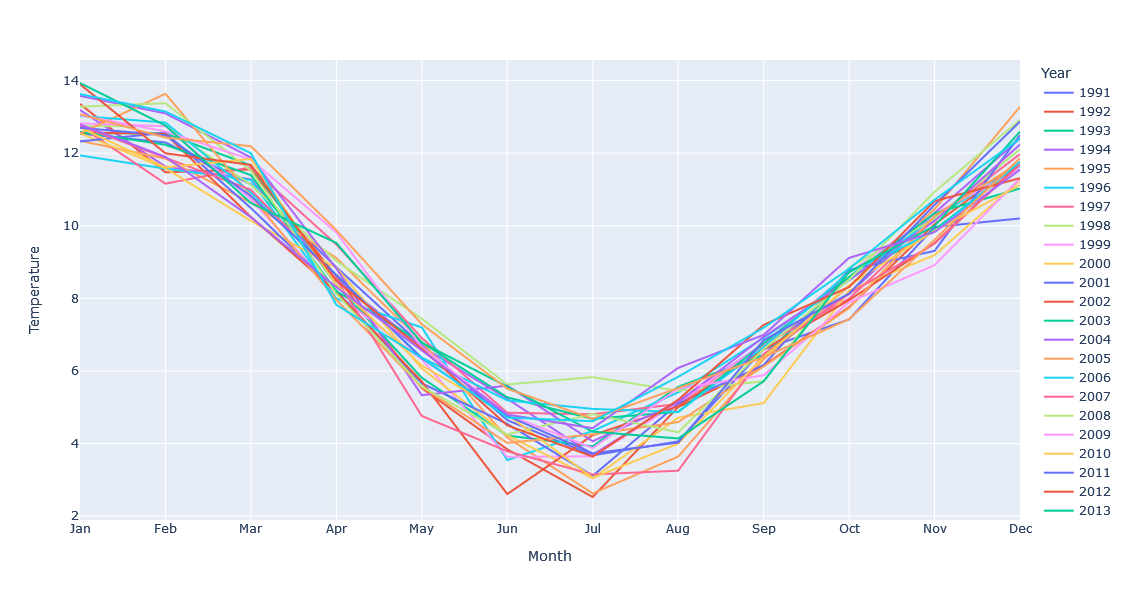

In [57]:
import plotly.express as px

px.line(t_chile, x="Month", y="Temperature", color="Year", height=600)

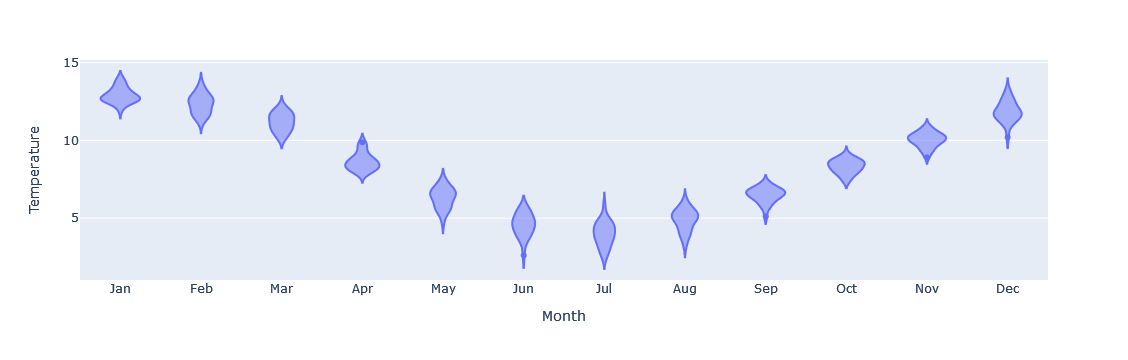

In [58]:
fig = px.violin(t_chile, x="Month", y="Temperature")
fig.show()

### Paso 1: Separar

En esta parte veremos el primer paso del group-by: **Separar** por grupos.


![Group By](./resources/group_by.png)


Para esto, agrupamos temperaturas de Chile por mes:

#### Cantidad de Grupos

In [60]:
t_chile.head(10)

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
10613,4.64511,1991,Jun,Chile,CHL
10614,3.67834,1991,Jul,Chile,CHL
10615,4.05806,1991,Aug,Chile,CHL
10616,6.60080,1991,Sep,Chile,CHL
10617,7.41883,1991,Oct,Chile,CHL


In [62]:
t_chile.groupby("Month")

In [61]:
len(t_chile.groupby("Month"))

12

#### Obtener el Listado de Grupos que Generó 

In [63]:
import pprint

pprint.pprint(t_chile.groupby("Month").groups)

{'Apr': Int64Index([10611, 10623, 10635, 10647, 10659, 10671, 10683, 10695, 10707,
            10719, 10731, 10743, 10755, 10767, 10779, 10791, 10803, 10815,
            10827, 10839, 10851, 10863, 10875, 10887, 10899, 10911],
           dtype='int64'),
 'Aug': Int64Index([10615, 10627, 10639, 10651, 10663, 10675, 10687, 10699, 10711,
            10723, 10735, 10747, 10759, 10771, 10783, 10795, 10807, 10819,
            10831, 10843, 10855, 10867, 10879, 10891, 10903, 10915],
           dtype='int64'),
 'Dec': Int64Index([10619, 10631, 10643, 10655, 10667, 10679, 10691, 10703, 10715,
            10727, 10739, 10751, 10763, 10775, 10787, 10799, 10811, 10823,
            10835, 10847, 10859, 10871, 10883, 10895, 10907, 10919],
           dtype='int64'),
 'Feb': Int64Index([10609, 10621, 10633, 10645, 10657, 10669, 10681, 10693, 10705,
            10717, 10729, 10741, 10753, 10765, 10777, 10789, 10801, 10813,
            10825, 10837, 10849, 10861, 10873, 10885, 10897, 10909],
           

In [64]:
t_chile.loc[
    [
        10611,
        10623,
        10635,
        10647,
        10659,
        10671,
        10683,
        10695,
        10707,
        10719,
        10731,
        10743,
        10755,
        10767,
        10779,
        10791,
        10803,
        10815,
        10827,
        10839,
        10851,
        10863,
        10875,
        10887,
        10899,
        10911,
    ]
]

,Temperature,Year,Month,Country,ISO3
10611,8.85700,1991,Apr,Chile,CHL
10623,8.61049,1992,Apr,Chile,CHL
10635,8.37375,1993,Apr,Chile,CHL
10647,8.52128,1994,Apr,Chile,CHL
10659,9.11017,1995,Apr,Chile,CHL
10671,7.99297,1996,Apr,Chile,CHL
10683,9.48273,1997,Apr,Chile,CHL
10695,9.02652,1998,Apr,Chile,CHL
10707,8.12245,1999,Apr,Chile,CHL
10719,8.84131,2000,Apr,Chile,CHL


#### Obtener algún grupo en particular

In [65]:
t_chile.groupby("Month").get_group("Apr")

,Temperature,Year,Month,Country,ISO3
10611,8.85700,1991,Apr,Chile,CHL
10623,8.61049,1992,Apr,Chile,CHL
10635,8.37375,1993,Apr,Chile,CHL
10647,8.52128,1994,Apr,Chile,CHL
10659,9.11017,1995,Apr,Chile,CHL
10671,7.99297,1996,Apr,Chile,CHL
10683,9.48273,1997,Apr,Chile,CHL
10695,9.02652,1998,Apr,Chile,CHL
10707,8.12245,1999,Apr,Chile,CHL
10719,8.84131,2000,Apr,Chile,CHL


### Paso 2: Aplicar

En este paso veremos las distintas opciones que tenemos en el paso **aplicar**: agregar, transformar o filtrar.

![Group By](./resources/group_by.png)



#### Agregar

Una de estas opciones son las funciones de agregación: operaciones que cuentan o obtienen estadísticos a cerca de cada grupo.

Algunas funciones de agregación built-in de pandas son:
<div align='center'>
<img src="./resources/aggregations.png" alt="Agregaciones" width=500px/>
</div>

##### Tamaño

In [66]:
t_chile.groupby("Month").size()

Month
Apr    26
Aug    26
Dec    26
Feb    26
Jan    26
Jul    26
Jun    26
Mar    26
May    26
Nov    26
Oct    26
Sep    26
dtype: int64

##### Promedio

**Por  Mes**

In [67]:
t_chile

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


In [68]:
t_chile_prom_mes = t_chile.groupby("Month").mean()
t_chile_prom_mes

,Temperature,Year
Month,,
Apr,8.632918,2003.5
Aug,4.874367,2003.5
Dec,11.862162,2003.5
Feb,12.331531,2003.5
Jan,12.890127,2003.5
Jul,3.990776,2003.5
Jun,4.566924,2003.5
Mar,11.175054,2003.5
May,6.305406,2003.5


In [70]:
# Arreglo de conveniencia para ordenar los resultados por mes.
MESES = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

t_chile_prom_mes = t_chile.groupby("Month").mean()
t_chile_prom_mes = t_chile_prom_mes.loc[MESES]

t_chile_prom_mes

,Temperature,Year
Month,,
Jan,12.890127,2003.5
Feb,12.331531,2003.5
Mar,11.175054,2003.5
Apr,8.632918,2003.5
May,6.305406,2003.5
Jun,4.566924,2003.5
Jul,3.990776,2003.5
Aug,4.874367,2003.5
Sep,6.479313,2003.5


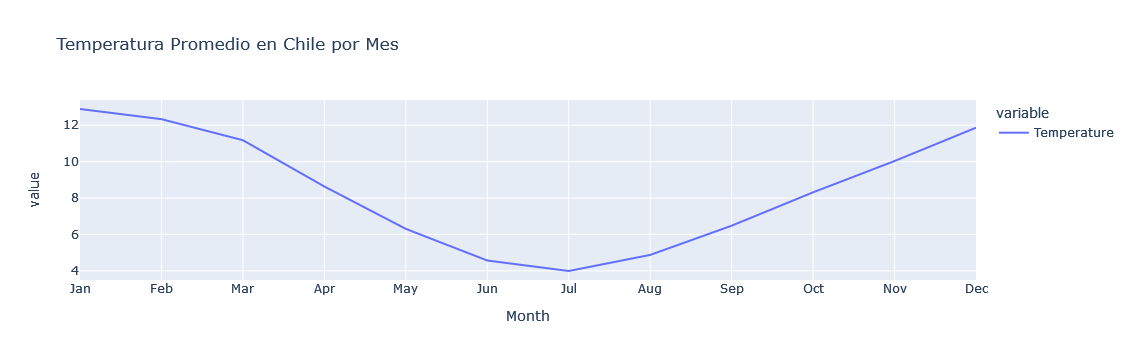

In [71]:
px.line(
    t_chile_prom_mes["Temperature"],
    title="Temperatura Promedio en Chile por Mes",
)

In [ ]:
t_chile

> Ejercicio: Agrupar por lustros y ver como se mueve la media.

**Por Año**

In [72]:
t_chile_prom_año = t_chile.groupby("Year").mean()
t_chile_prom_año

,Temperature
Year,
1991,8.174618
1992,8.132774
1993,8.435058
1994,8.583360
1995,8.296743
1996,8.378638
1997,8.626498
1998,8.903882
1999,8.373395


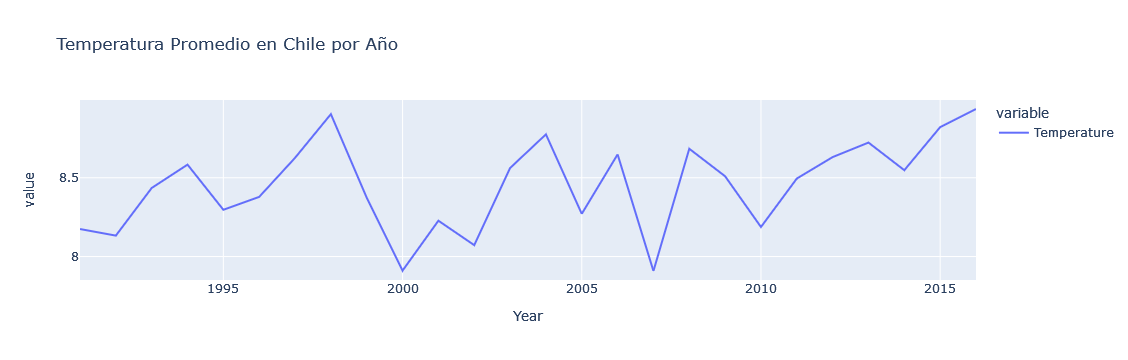

In [73]:
px.line(
    t_chile_prom_año,
    title="Temperatura Promedio en Chile por Año",
)


#### Describe 

Por mes:

In [74]:
chile_t_stats = t_chile.groupby("Month").describe()["Temperature"]
chile_t_stats = chile_t_stats.loc[MESES]
chile_t_stats

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
Jan,26.0,12.890127,0.489691,11.93590,12.552500,12.747900,13.157900,13.92960
Feb,26.0,12.331531,0.634695,11.15750,11.855550,12.459100,12.744125,13.63310
Mar,26.0,11.175054,0.583369,10.13310,10.753150,11.198250,11.646675,12.18950
Apr,26.0,8.632918,0.561895,7.82234,8.197055,8.531000,8.853077,9.87860
May,26.0,6.305406,0.658122,4.75968,5.735210,6.363575,6.760283,7.43721
Jun,26.0,4.566924,0.731938,2.61044,4.182020,4.681900,5.105257,5.62819
Jul,26.0,3.990776,0.782743,2.52941,3.643715,3.995465,4.568388,5.82987
Aug,26.0,4.874367,0.694196,3.25353,4.381372,5.060210,5.360117,6.08457
Sep,26.0,6.479313,0.492104,5.11566,6.202398,6.596555,6.762740,7.26955


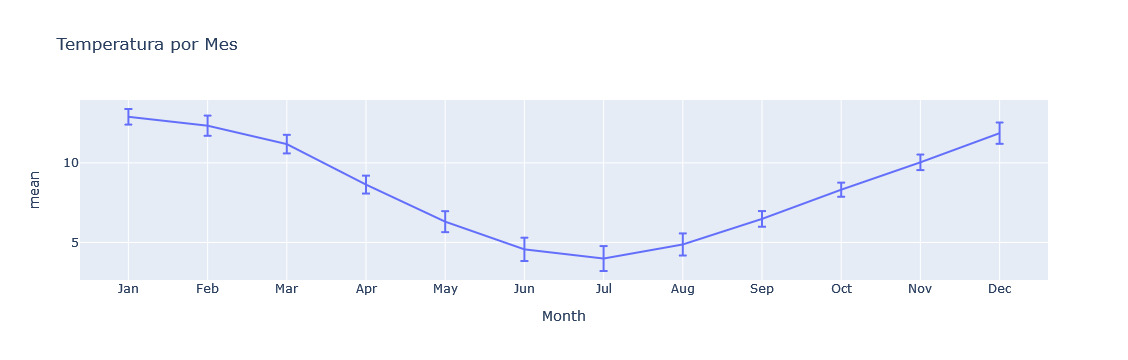

In [75]:
px.line(
    chile_t_stats.reset_index(),
    x="Month",
    y="mean",
    error_y="std",
    title="Temperatura por Mes",
)

#### Usar como filtro

Exactamente igual a `temperaturas[temperaturas['Country'] == 'Chile']`

In [76]:
temperaturas.head(10)

,Temperature,Year,Month,Country,ISO3
0,-0.03110,1991,Jan,Afghanistan,AFG
1,1.43654,1991,Feb,Afghanistan,AFG
2,6.88685,1991,Mar,Afghanistan,AFG
3,12.93970,1991,Apr,Afghanistan,AFG
4,17.07550,1991,May,Afghanistan,AFG
5,23.07770,1991,Jun,Afghanistan,AFG
6,25.57100,1991,Jul,Afghanistan,AFG
7,23.96730,1991,Aug,Afghanistan,AFG
8,19.38000,1991,Sep,Afghanistan,AFG
9,12.87790,1991,Oct,Afghanistan,AFG


In [77]:
temperaturas["Country"] == "Chile"

0        False
1        False
2        False
3        False
4        False
         ...  
59899    False
59900    False
59901    False
59902    False
59903    False
Name: Country, Length: 59904, dtype: bool

In [ ]:
temperaturas[temperaturas["Country"] == "Chile"].head(3)

In [78]:
temperaturas.groupby(["Country"]).get_group("Chile")

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


#### Multi-indice

También podemos ejecutar la agregación sobre varias columnas. Esto generará un DataFrame multi-indice.

In [79]:
stats_general = temperaturas.groupby(["Country", "Year"]).describe()

In [80]:
stats_general

Temperature                                            \
                       count       mean       std       min        25%   
Country     Year                                                         
Afghanistan 1991        12.0  12.894488  8.980163  -0.03110   6.224065   
            1992        12.0  12.544548  8.386016   0.74637   5.404147   
            1993        12.0  12.977138  8.719243  -0.08350   5.673917   
            1994        12.0  13.080018  8.875672   1.11415   7.360107   
            1995        12.0  13.040895  9.092189   0.92358   5.517030   
...                      ...        ...       ...       ...        ...   
Venezuela   2012        12.0  25.764883  0.374583  25.21710  25.501125   
            2013        12.0  25.922492  0.553798  25.29310  25.465375   
            2014        12.0  26.028775  0.477228  25.39520  25.724875   
            2015        12.0  26.438175  0.430423  25.63690  26.114800   
            2016        12.0  26.478200  0.474389  25.84420  26.120150   

                                                
                       50%        75%      max  
Country     Year                                
Afghanistan 1991  12.90880  20.304425  25.5710  
            1992  12.19535  19.109925  24.7068  
            1993  12.70540  20.447725  24.6320  
            1994  12.24925  19.975575  25.0045  
            1995  12.90710  20.140400  25.7798  
...                    ...        ...      ...  
Venezuela   2012  25.72885  26.049450  26.4330  
            2013  25.93485  26.091300  27.1409  
            2014  25.87900  26.356625  26.9757  
            2015  26.50315  26.729575  27.0908  
            2016  26.41585  26.755900  27.3357  

[4992 rows x 8 columns]

In [81]:
temperature_stats_general = stats_general["Temperature"]

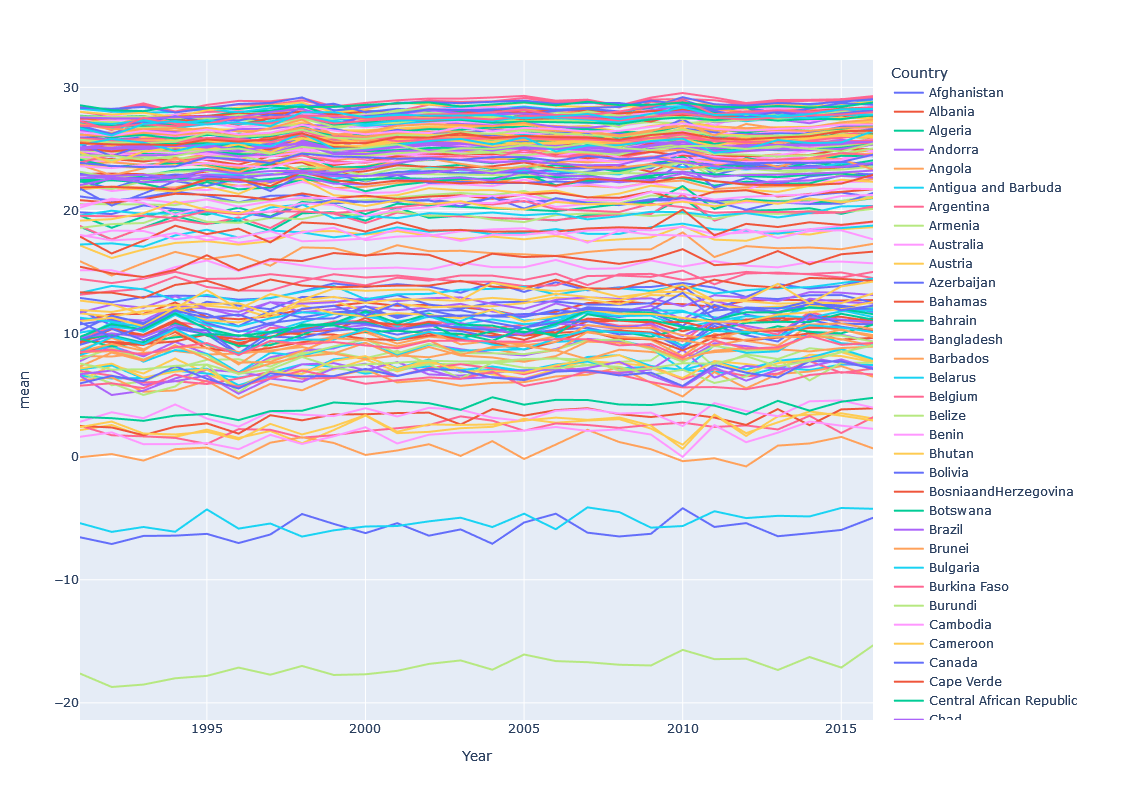

In [82]:
px.line(
    temperature_stats_general.reset_index(),
    x="Year",
    y="mean",
    color="Country",
    height=800,
)

### `agg`

`agg` permite agregar datos por grupo usando una o más operaciones:

In [83]:
prom_t_año_global = temperaturas.groupby(["Year"]).agg(
    {
        "Temperature": ["mean", "std"]
    }
)
prom_t_año_global

Temperature           
            mean        std
Year                       
1991   18.716174  10.292725
1992   18.651461  10.173134
1993   18.632208  10.336513
1994   18.944268  10.161263
1995   18.937594  10.209406
1996   18.630084  10.496066
1997   18.922807  10.228958
1998   19.273504  10.353435
1999   19.085536  10.057636
2000   19.083361  10.013080
2001   19.177183  10.245669
2002   19.296718  10.131432
2003   19.208448  10.359996
2004   19.167283  10.150215
2005   19.185109  10.356420
2006   19.228243  10.247942
2007   19.311888   9.994144
2008   19.172404  10.048448
2009   19.327523  10.205430
2010   19.365938  10.526774
2011   19.184153  10.207967
2012   19.197032  10.445062
2013   19.259569  10.190078
2014   19.464966   9.928222
2015   19.581111  10.024540
2016   19.642927  10.119874

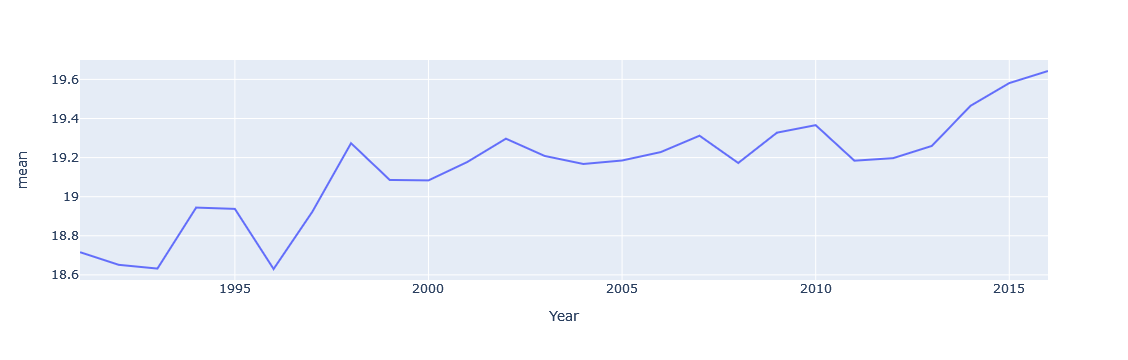

In [84]:
px.line(prom_t_año_global.droplevel(0, axis=1).reset_index(), x="Year", y="mean")